
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable 1 - Ejercicio 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import os

seaborn.set_context('talk')
seaborn.set(font_scale=1)

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

profile_gender  profile_age work_country                    work_province  \
0          Mujer           26    Argentina  Ciudad Autónoma de Buenos Aires   
1         Hombre           29    Argentina                       Corrientes   
2          Mujer           22    Argentina  Ciudad Autónoma de Buenos Aires   

   profile_years_experience  work_years_in_company  \
0                       3.0                    3.0   
1                       5.0                    2.0   
2                       2.0                    0.0   

   work_years_in_current_position  work_people_in_charge_of  \
0                             3.0                         0   
1                             2.0                         4   
2                             0.0                         0   

  profile_studies_level profile_studies_level_state  ...  \
0         Universitario                    En curso  ...   
1         Universitario                    En curso  ...   
2            Secundario                  Completado  ...   

  work_has_violence_situations profile_sexual_orientation  \
0         En mi trabajo actual                 Homosexual   
1                        Jamás               Heterosexual   
2       En un trabajo anterior           Bisexual o queer   

  profile_has_disabilities profile_has_disabilities_hiring_difficulties  \
0                      NaN                                          NaN   
1                   Visual                                           No   
2                      NaN                                           No   

  company_employee_number                          company_main_activity  \
0                501-1000  Servicios / Consultoría de Software / Digital   
1                 201-500                               Otras industrias   
2               2001-5000                               Otras industrias   

  company_recommended company_diversity_policies  \
0                   7                          2   
1                   8                          9   
2                   6                          9   

                              company_extra_benefits  \
0  Capacitaciones y/o cursos, Comidas pagas / sub...   
1  Horarios flexibles, Stock options / RSUs, Viát...   
2  Clases de gimnasia online, Comidas pagas / sub...   

  company_best_companies_city  
0                         NaN  
1                         NaN  
2                         NaN  

[3 rows x 48 columns]

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [4]:
# Seleccionamos las columnas que consideramos relevantes para el analisis
relevant_columns = ['profile_age',
                    'profile_years_experience',
                    'work_years_in_company',
                    'work_people_in_charge_of',
                    'profile_studies_level',
                    'profile_specialization_courses',

                    'company_employee_number',
                    'company_diversity_policies',
                    'company_extra_benefits',

                    'tools_programming_languages',
                    'tools_frameworks',
                    'tools_data_bases',
                    
                    'work_contract_type',
                    'salary_monthly_NETO',
                    'salary_monthly_BRUTO',
                    'salary_has_bonus'] 

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [5]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [6]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

programming_language  profile_age  profile_years_experience  \
0              ninguno           26                       3.0   
1                 html           29                       5.0   
1           javascript           29                       5.0   
1               python           29                       5.0   
2              ninguno           22                       2.0   

   work_years_in_company  work_people_in_charge_of profile_studies_level  \
0                    3.0                         0         Universitario   
1                    2.0                         4         Universitario   
1                    2.0                         4         Universitario   
1                    2.0                         4         Universitario   
2                    0.0                         0            Secundario   

                      profile_specialization_courses company_employee_number  \
0                          Sí, los pagó un empleador                501-1000   
1  Sí, de forma particular, Sí, los pagó un emple...                 201-500   
1  Sí, de forma particular, Sí, los pagó un emple...                 201-500   
1  Sí, de forma particular, Sí, los pagó un emple...                 201-500   
2  Sí, de forma particular, Sí, los pagó un emple...               2001-5000   

   company_diversity_policies  \
0                           2   
1                           9   
1                           9   
1                           9   
2                           9   

                              company_extra_benefits  \
0  Capacitaciones y/o cursos, Comidas pagas / sub...   
1  Horarios flexibles, Stock options / RSUs, Viát...   
1  Horarios flexibles, Stock options / RSUs, Viát...   
1  Horarios flexibles, Stock options / RSUs, Viát...   
2  Clases de gimnasia online, Comidas pagas / sub...   

  tools_programming_languages tools_frameworks             tools_data_bases  \
0                     Ninguno          Ninguno                      Ninguna   
1    HTML, Javascript, Python   Django, jQuery  Informix, MySQL, PostgreSQL   
1    HTML, Javascript, Python   Django, jQuery  Informix, MySQL, PostgreSQL   
1    HTML, Javascript, Python   Django, jQuery  Informix, MySQL, PostgreSQL   
2                     Ninguno          Ninguno                      Ninguna   

  work_contract_type  salary_monthly_NETO  salary_monthly_BRUTO  \
0          Full-Time              43000.0               53000.0   
1          Full-Time              63000.0               79000.0   
1          Full-Time              63000.0               79000.0   
1          Full-Time              63000.0               79000.0   
2          Full-Time             127000.0              160000.0   

     salary_has_bonus cured_programming_languages  
0                  No                   [ninguno]  
1  Menos de un sueldo  [html, javascript, python]  
1  Menos de un sueldo  [html, javascript, python]  
1  Menos de un sueldo  [html, javascript, python]  
2           Un sueldo                   [ninguno]

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [7]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

language  frequency
0  javascript       2513
1         sql       2154
2        html       1861
3      python       1475
4        java       1453
5         css       1247
6  bash/shell        993
7         php        891
8        .net        823
9  typescript        779

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [8]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["Python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

Empty DataFrame
Columns: [programming_language, profile_age, profile_years_experience, work_years_in_company, work_people_in_charge_of, profile_studies_level, profile_specialization_courses, company_employee_number, company_diversity_policies, company_extra_benefits, tools_programming_languages, tools_frameworks, tools_data_bases, work_contract_type, salary_monthly_NETO, salary_monthly_BRUTO, salary_has_bonus, cured_programming_languages]
Index: []

# Ejercicio 1 - Respuesta


### 1. Seleccionar las columnas relevantes para analizar.


Para el analisis nos enfocaremos en cinco aspectos:

  * Caracteristicas personales de los individuos: Edad, años de experiencia profesional, formacion academica, cursos realizados y años de trayectoria en la empresa.

  * Caracteristicas del stack tecnologico que maneja: Lenguajes de programacion que manejan.

  * Caracteristicas de la empresa: Cantidad de empleados (tamaño), beneficios adicionales que ofrecen a sus empleados y politicas de diversidad con las que cuenta.

  * Caracteristicas del rol: Cantidad de personas a cargo y tipo de contrato (part-time / full-time).

  * Compensacion laboral: Sueldo bruto, sueldo neto, y bonos.


Objetivo: Evaluar la incidencia de cada uno de estos aspectos en la compensacion de los individuos.


In [9]:
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

In [10]:
# Seleccionamos las columnas que consideramos relevantes para el analisis
relevant_columns = ['profile_age', 
                    'profile_gender',
                    'profile_years_experience', 
                    'profile_studies_level', 
                    'profile_specialization_courses', 
                    'work_years_in_company', 

                    'tools_programming_languages', 

                    'company_employee_number',
                    'company_diversity_policies',
                    'company_extra_benefits',

                    'work_people_in_charge_of',
                    'work_contract_type',
                    
                    'salary_monthly_BRUTO',
                    'salary_monthly_NETO', 
                    'salary_has_bonus',
                    
                    'cured_programming_languages'] 

In [11]:
df.describe()

profile_age  profile_years_experience  work_years_in_company  \
count   6095.000000               6095.000000            6095.000000   
mean      41.181952                  8.930861               3.311944   
std      665.721175                  7.161094               4.367742   
min       18.000000                  0.000000               0.000000   
25%       27.000000                  3.000000               0.000000   
50%       31.000000                  7.000000               2.000000   
75%       37.000000                 13.000000               4.000000   
max    52000.000000                115.000000              43.000000   

       work_years_in_current_position  work_people_in_charge_of  \
count                     6095.000000               6095.000000   
mean                         2.889770                  2.211649   
std                          3.423228                 32.983395   
min                          0.000000                  0.000000   
25%                          1.000000                  0.000000   
50%                          2.000000                  0.000000   
75%                          4.000000                  0.000000   
max                         34.000000               2500.000000   

       salary_on_call_duty_charge  salary_monthly_BRUTO  salary_monthly_NETO  \
count                 6095.000000          6.095000e+03         5.883000e+03   
mean                   664.042084          1.240585e+05         9.490795e+04   
std                  10540.523461          1.229124e+05         9.686226e+04   
min                      0.000000          1.000000e+00         1.000000e+00   
25%                      0.000000          6.159500e+04         5.148000e+04   
50%                      0.000000          9.600000e+04         7.800000e+04   
75%                      0.000000          1.450000e+05         1.060000e+05   
max                 650000.000000          2.180000e+06         2.080000e+06   

       salary_satisfaction  salary_comparison_last_semester  \
count          6095.000000                      6095.000000   
mean              2.619524                         2.363577   
std               0.858621                         0.945713   
min               1.000000                         1.000000   
25%               2.000000                         2.000000   
50%               3.000000                         2.000000   
75%               3.000000                         3.000000   
max               4.000000                         4.000000   

       salary_percentage_inflation_adjustment_2020  \
count                                  6095.000000   
mean                                     10.444511   
std                                      12.860433   
min                                       0.000000   
25%                                       0.000000   
50%                                       7.000000   
75%                                      18.000000   
max                                     100.000000   

       salary_month_last_inflation_adjustment  company_recommended  \
count                             6095.000000          6095.000000   
mean                                 2.785562             7.340115   
std                                  2.837195             2.024057   
min                                  0.000000             1.000000   
25%                                  0.000000             6.000000   
50%                                  2.000000             8.000000   
75%                                  6.000000             9.000000   
max                                  8.000000            10.000000   

       company_diversity_policies  
count                 6095.000000  
mean                     7.621001  
std                      2.324034  
min                      1.000000  
25%                      6.000000  
50%                      8.000000  
75%                     10.000000  
max                     10.000000

### 2. Seleccionar las filas relevantes para analizar.


Para la limpieza de los datos nos enfocaremos en:

  * Eliminacion de filas que presenten datos nulos en Salario Bruto y/o Salario Neto.

  * Eliminacion de outliers.

  * Eliminacion de aquellas cuyas respuestas presenten incongruencias logicas. Ejem: Sueldo Neto mayor al Sueldo Bruto; Mayor cantidad de años de experiencia que de años de vida, Sueldo Bruto por debajo del Sueldo Minimo en Argentina, etc. 

Objetivo: Obtener informacion que nos resulte util para el analisis estadistico, y contribuya al grado de veracidad de sus resultados.


In [12]:
# Creamos una nueva base de datos con las columnas seleccionadas
df_columns = df[relevant_columns].copy()
# Vemos la cantidad de valores nulos en las columnas seleccionadas
df_columns.isnull().sum()
# Eliminamos las filas que presenten valores nulos en alguna de las columnas seleccionadas
df_columns.dropna(inplace=True)
# Chequeamos que efectivamente se hayan eliminado de la base de datos
df_columns.isnull().sum()

profile_age                       0
profile_gender                    0
profile_years_experience          0
profile_studies_level             0
profile_specialization_courses    0
work_years_in_company             0
tools_programming_languages       0
company_employee_number           0
company_diversity_policies        0
company_extra_benefits            0
work_people_in_charge_of          0
work_contract_type                0
salary_monthly_BRUTO              0
salary_monthly_NETO               0
salary_has_bonus                  0
cured_programming_languages       0
dtype: int64

In [13]:
# Eliminamos valores por fuera del 2do y 3er cuartil
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    
    Q1 = interesting_col.quantile(0.25)
    Q3 = interesting_col.quantile(0.75)
    IQR = Q3 - Q1
    
    return dataset[~((interesting_col < (Q1 - 1.5 * IQR)) | (interesting_col > (Q3 + 1.5 * IQR)))]

In [14]:
# Observamos los valores para cada una de las columnas seleccionadas
df_columns.describe()

profile_age  profile_years_experience  work_years_in_company  \
count   5881.000000               5881.000000            5881.000000   
mean      41.459786                  8.892127               3.330862   
std      677.724224                  7.172679               4.382922   
min       18.000000                  0.000000               0.000000   
25%       27.000000                  3.000000               0.000000   
50%       31.000000                  7.000000               2.000000   
75%       37.000000                 13.000000               4.000000   
max    52000.000000                115.000000              43.000000   

       company_diversity_policies  work_people_in_charge_of  \
count                 5881.000000               5881.000000   
mean                     7.612141                  2.195375   
std                      2.330159                 33.535017   
min                      1.000000                  0.000000   
25%                      6.000000                  0.000000   
50%                      8.000000                  0.000000   
75%                     10.000000                  0.000000   
max                     10.000000               2500.000000   

       salary_monthly_BRUTO  salary_monthly_NETO  
count          5.881000e+03         5.881000e+03  
mean           1.219826e+05         9.490843e+04  
std            1.207148e+05         9.687698e+04  
min            1.000000e+00         1.000000e+00  
25%            6.100000e+04         5.146000e+04  
50%            9.500000e+04         7.800000e+04  
75%            1.430000e+05         1.060000e+05  
max            2.180000e+06         2.080000e+06

In [15]:
# Procedemos a eliminar outliers y visualizar nuevamente los resultados
df_outliers = clean_outliers(df_columns,relevant_columns)
df_outliers.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.


profile_age  profile_years_experience  work_years_in_company  \
count  5801.000000               5784.000000            5454.000000   
mean     32.213756                  8.494225               2.382985   
std       6.742594                  6.432104               2.589007   
min      18.000000                  0.000000               0.000000   
25%      27.000000                  3.000000               0.000000   
50%      31.000000                  7.000000               2.000000   
75%      37.000000                 13.000000               3.000000   
max      52.000000                 28.000000              10.000000   

       company_diversity_policies  work_people_in_charge_of  \
count                 5881.000000                    4442.0   
mean                     7.612141                       0.0   
std                      2.330159                       0.0   
min                      1.000000                       0.0   
25%                      6.000000                       0.0   
50%                      8.000000                       0.0   
75%                     10.000000                       0.0   
max                     10.000000                       0.0   

       salary_monthly_BRUTO  salary_monthly_NETO  
count           5512.000000          5488.000000  
mean           99447.646171         76446.742086  
std            54388.148498         37179.123426  
min                1.000000             1.000000  
25%            60000.000000         50000.000000  
50%            90000.000000         74000.000000  
75%           131010.500000        100000.000000  
max           265558.720000        187000.000000

In [16]:
# Creamos un nuevo dataset reindexado
df_final = df_outliers.reset_index(level=-1, drop=True)

In [17]:
# Buscamos aquellas filas cuyas respuestas presenten incongruencias logicas
condition_salary_NETO = (df_final['salary_monthly_NETO'] > df_final['salary_monthly_BRUTO']) 
result_salary_NETO = df_final[condition_salary_NETO].salary_monthly_NETO.count()

condition_year_experience = (df_final['profile_years_experience'] > df_final['profile_age'])
result_years_experience = df_final[condition_year_experience].profile_years_experience.count()
print('Cantidad de valores incongruentes en Salario NETO: ', result_salary_NETO,
      '\nCantidad de valores incongruentes en Años de Experiencia: ', result_years_experience,
      '\nIndice de valores incongruentes',df_final[condition_salary_NETO].salary_monthly_NETO.index)
remove_rows_salary = df_final.index[condition_salary_NETO].tolist()

Cantidad de valores incongruentes en Salario NETO:  141 
Cantidad de valores incongruentes en Años de Experiencia:  0 
Indice de valores incongruentes Int64Index([  11,   21,  155,  239,  462,  518,  579,  601,  679,  681,
            ...
            5557, 5567, 5603, 5606, 5637, 5644, 5763, 5774, 5793, 5822],
           dtype='int64', length=141)


In [18]:
# Eliminamos aquellas filas cuyas respuestas presenten incongruencias logicas
df_final.drop(df_final.index[remove_rows_salary], inplace=True)

# Chequeamos nuevamente por valores nulos
df_final.isnull().sum()
# Eliminamos las filas que presenten valores nulos en alguna de las columnas seleccionadas
df_final.dropna(inplace=True)
# # Chequeamos que efectivamente se hayan eliminado de la base de datos
df_final.isnull().sum()

profile_age                       0
profile_gender                    0
profile_years_experience          0
profile_studies_level             0
profile_specialization_courses    0
work_years_in_company             0
tools_programming_languages       0
company_employee_number           0
company_diversity_policies        0
company_extra_benefits            0
work_people_in_charge_of          0
work_contract_type                0
salary_monthly_BRUTO              0
salary_monthly_NETO               0
salary_has_bonus                  0
cured_programming_languages       0
dtype: int64

In [19]:
df_final.describe()

profile_age  profile_years_experience  work_years_in_company  \
count  3862.000000               3862.000000            3862.000000   
mean     30.691352                  6.724676               2.045598   
std       6.129697                  5.560542               2.374516   
min      18.000000                  0.000000               0.000000   
25%      26.000000                  2.000000               0.000000   
50%      30.000000                  5.000000               1.000000   
75%      34.000000                 10.000000               3.000000   
max      52.000000                 28.000000              10.000000   

       company_diversity_policies  work_people_in_charge_of  \
count                 3862.000000                    3862.0   
mean                     7.688503                       0.0   
std                      2.275295                       0.0   
min                      1.000000                       0.0   
25%                      6.000000                       0.0   
50%                      8.000000                       0.0   
75%                     10.000000                       0.0   
max                     10.000000                       0.0   

       salary_monthly_BRUTO  salary_monthly_NETO  
count           3862.000000          3862.000000  
mean           93132.389653         71608.773120  
std            49045.610964         34813.662314  
min                1.000000             1.000000  
25%            56000.000000         46000.000000  
50%            85000.000000         69028.000000  
75%           123000.000000         94000.000000  
max           265558.720000        186000.000000

In [20]:
# Obtenemos una lista con los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.

def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

df.loc[:, 'cured_programming_languages'] = df_final.tools_programming_languages\
    .apply(split_languages)

df_final_lang = df_final.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_final[relevant_columns])\
    .rename(columns={0: 'programming_language'})

language_count = df_final_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

language_count


language  frequency
0    javascript       1587
1           sql       1362
2          html       1157
3          java        931
4        python        896
..          ...        ...
143      apache          1
144         lex          1
145        yacc          1
146     unreal)          1
147   infobasic          1

[148 rows x 2 columns]

In [21]:
# Quitamos de la lista aquellos que no son lenguajes de programacion, y visualizamos la distribucion de los lenguajes relevantes
most_used_languages = language_count[language_count.frequency>language_count.frequency.quantile(.95)].language.tolist()
most_used_languages.remove('sql') # Not a programming language
most_used_languages.remove('html') # Not a programming language
most_used_languages.remove('css') # Not a programming language
most_used_languages.remove('bash/shell') # Not a programming language

interesting_languages = language_count[language_count.language.isin(most_used_languages)]
interesting_languages

language  frequency
0  javascript       1587
3        java        931
4      python        896
7        .net        496

In [22]:
# Creamos un dataset curado [dataset] el cual contrastaremos con [df_final_lang] que incluye el total de los datos curados (todos los lenguajes)
dataset = df_final_lang[df_final_lang.programming_language.isin(interesting_languages.language)].copy()
print(dataset.salary_monthly_NETO.describe(), os.linesep, os.linesep, df_final_lang.salary_monthly_NETO.describe())

# Reseteamos el indice y creamos una nueva columna que nos permita identificar a los individuos que respondieron
dataset.reset_index(inplace=True)
dataset.rename(columns={'index':'profile_id'},inplace=True)

count      3910.000000
mean      75287.729692
std       35494.133292
min           1.000000
25%       50000.000000
50%       74000.000000
75%       99000.000000
max      186000.000000
Name: salary_monthly_NETO, dtype: float64 
 
 count     10968.000000
mean      73778.705346
std       35630.174945
min           1.000000
25%       49000.000000
50%       71480.000000
75%       97000.000000
max      186000.000000
Name: salary_monthly_NETO, dtype: float64


### 3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas.


Para el analisis de los datos nos enfocaremos en:

  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.


In [23]:
top_languages = language_count[language_count.language.isin(most_used_languages)]
top_languages

language  frequency
0  javascript       1587
3        java        931
4      python        896
7        .net        496

Visualizamos la distribucion dentro de la subpoblacion de lenguajes mas utilizados por los programadores

  * Javascript es el mas utilizado
  * Hay mayor cantidad de desarrolladores backend que front-end. 
  
Agrupados por tipo de tecnologia podemos observar que el lenguaje Javascript utilizado para desarrollo front-end, representa un 40% de la distribucion y los lenguajes Java, Python y .Net, utilizados para el desarrollo backend, representan en conjunto el 60% de la distribucion.  

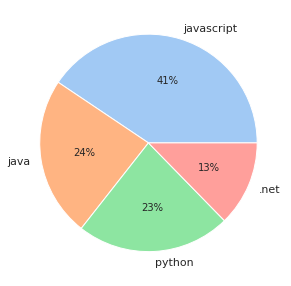

In [24]:
# Visualizamos los 3 lenguajes de mayor uso 
plt.figure(figsize=(5,5))
colors = seaborn.color_palette('pastel')[0:5]
chart_01 = plt.pie(top_languages.frequency, labels = top_languages.language, colors = colors, autopct='%.0f%%')

Hacemos una comparacion de la distribucion del Salario Neto respecto de cada uno de los lenguajes seleccionados, incluyendo todas las modalidades de trabajo.

  * Python es el mejor pago.

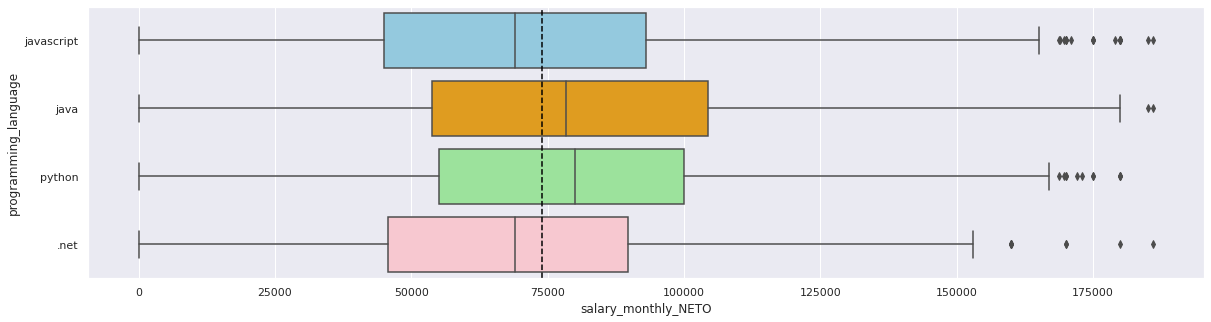

In [25]:
# Comparacion de distribucion del Salario Neto para cada uno de los lenguajes
fig = plt.figure(figsize=(20, 5))

my_pal = {"java": "orange", "python": "lightgreen", "javascript":"skyblue",".net":"pink"}
chart = seaborn.boxplot(data=dataset,x='salary_monthly_NETO',y="programming_language",palette=my_pal)
chart.axvline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

Hacemos una comparacion de la distribucion del Salario Neto respecto de cada uno de los lenguajes seleccionados, respecto de la modalidad de trabajo "Freelance"

  * Java es el mejor pago.

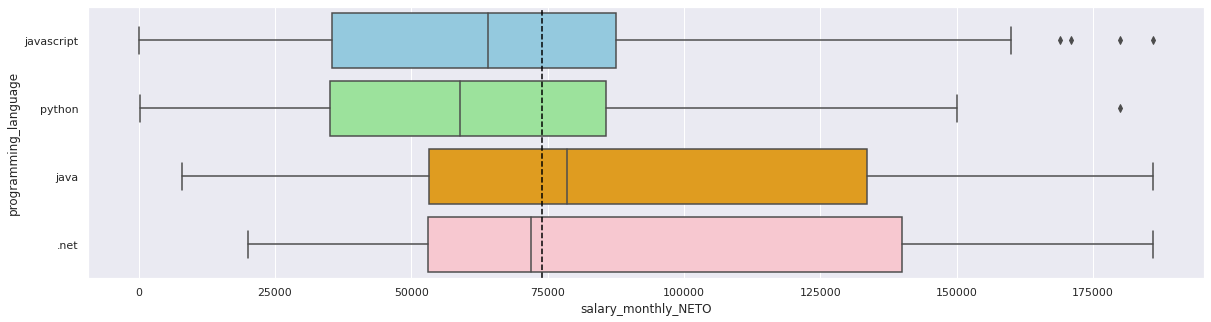

In [26]:
# Freelance
fig = plt.figure(figsize=(20, 5))

my_pal = {"java": "orange", "python": "lightgreen", "javascript":"skyblue",".net":"pink"}
chart = seaborn.boxplot(data=dataset[dataset.work_contract_type == 'Freelance'],x='salary_monthly_NETO',y="programming_language",palette=my_pal)
chart.axvline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

Hacemos una comparacion de la distribucion del Salario Neto respecto de cada uno de los lenguajes seleccionados, respecto de la modalidad de trabajo "Part-Time"

  * Python es el mejor pago.

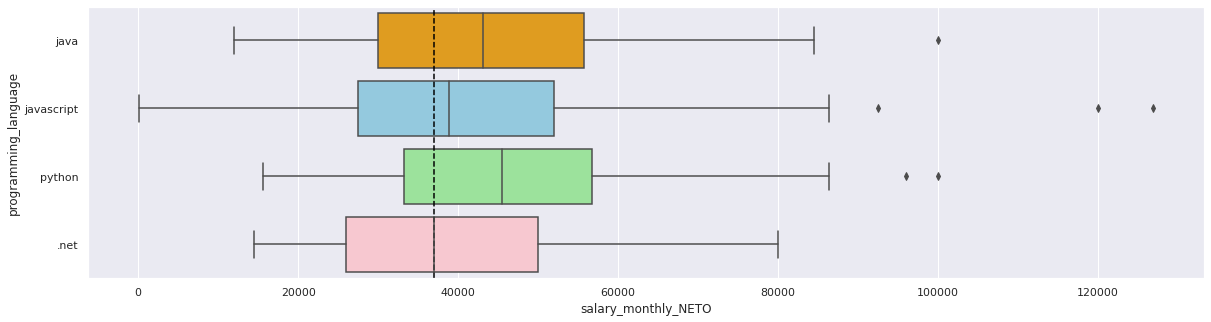

In [27]:
# Part-Time
fig = plt.figure(figsize=(20, 5))

my_pal = {"java": "orange", "python": "lightgreen", "javascript":"skyblue",".net":"pink"}
chart = seaborn.boxplot(data=dataset[dataset.work_contract_type == 'Part-Time'],x='salary_monthly_NETO',y="programming_language",palette=my_pal)
chart.axvline(dataset.salary_monthly_NETO.median()/2,linestyle='--', label='Media', color='black')

Hacemos una comparacion de la distribucion del Salario Neto respecto de cada uno de los lenguajes seleccionados, respecto de la modalidad de trabajo "Full-Time"

  * Python es el mejor pago.

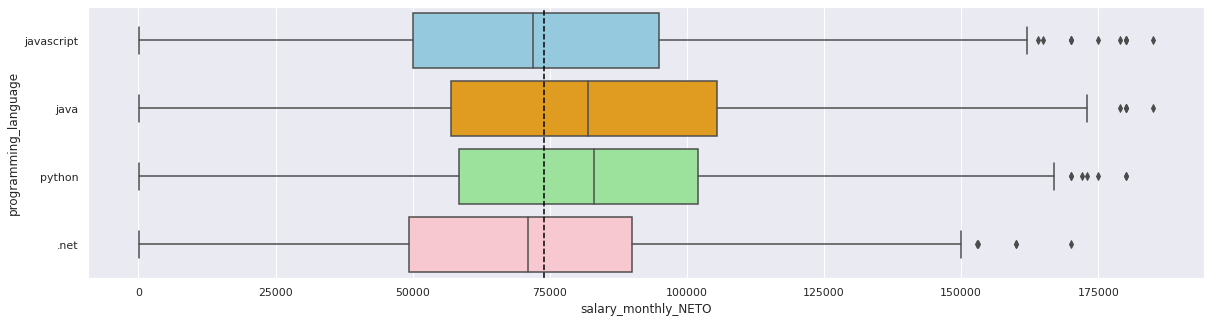

In [28]:
# Full-time
fig = plt.figure(figsize=(20, 5))

my_pal = {"java": "orange", "python": "lightgreen", "javascript":"skyblue",".net":"pink"}
chart = seaborn.boxplot(data=dataset[dataset.work_contract_type == 'Full-Time'],x='salary_monthly_NETO',y="programming_language",palette=my_pal)
chart.axvline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

Hacemos una comparacion de la distribucion del Salario Neto respecto de cada uno de los lenguajes seleccionados, respecto de la modalidad de trabajo "Tercerizado (trabajo a través de consultora o agencia)"

  * Python es el mejor pago.

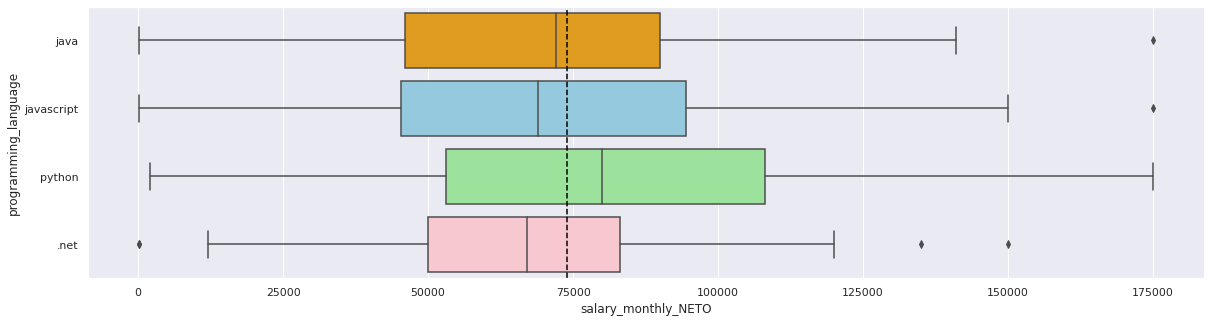

In [29]:
# Tercerizado (trabajo a través de consultora o agencia)
fig = plt.figure(figsize=(20, 5))

my_pal = {"java": "orange", "python": "lightgreen", "javascript":"skyblue",".net":"pink"}
chart = seaborn.boxplot(data=dataset[dataset.work_contract_type == 'Tercerizado (trabajo a través de consultora o agencia)'],x='salary_monthly_NETO',y="programming_language",palette=my_pal)
chart.axvline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

Hacemos una comparacion de la distribucion del Salario Neto respecto de cada uno de los lenguajes seleccionados, respecto de la modalidad de trabajo "Remoto (empresa de otro pais)"

  * Java es el mejor pago.

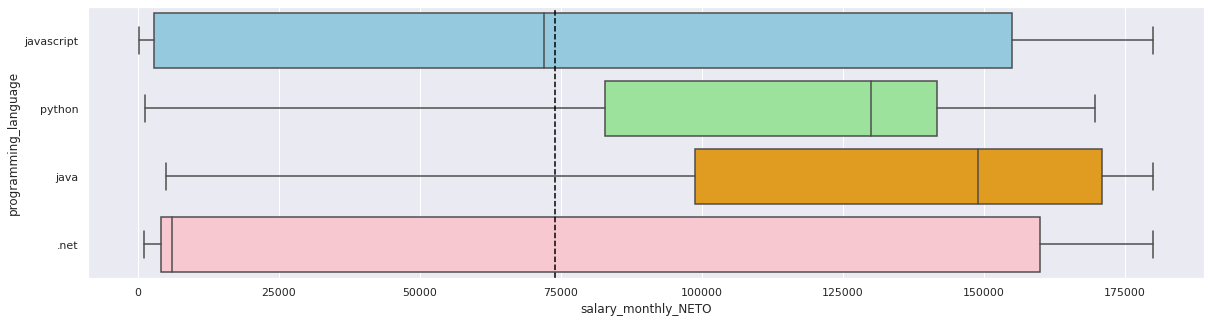

In [30]:
# Remoto (empresa de otro país)
fig = plt.figure(figsize=(20, 5))

my_pal = {"java": "orange", "python": "lightgreen", "javascript":"skyblue",".net":"pink"}
chart = seaborn.boxplot(data=dataset[dataset.work_contract_type == 'Remoto (empresa de otro país)'],x='salary_monthly_NETO',y="programming_language",palette=my_pal)
chart.axvline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')


Hacemos una comparacion de la distribucion del Salario Neto respecto del "tamaño de la empresa (cantidad de empleados)"

  * Los sueldos de las empresas de mas de 200 empleados tienen una mediana por encima de la general


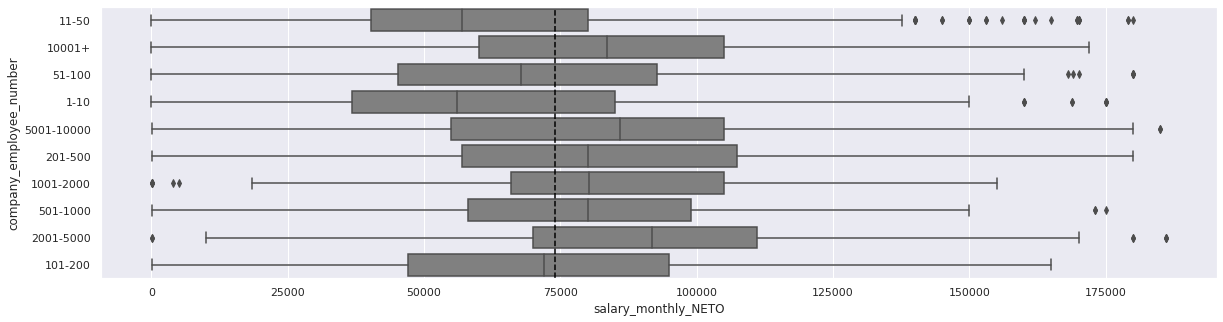

In [31]:
# Cantidad de empleados de la empresa
fig = plt.figure(figsize=(20, 5))

chart = seaborn.boxplot(data=dataset,x='salary_monthly_NETO',y="company_employee_number",color='gray')
chart.axvline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

Analizamos la distribucion respecto de la "edad", "años de experiencia" para todos los lenguajes

  * Los sueldos de quienes tienen mas de 28 años se encuentran por encima de la mediana
  * Los sueldos de quienes tienen mas de 4 años de experiencia se encuentran por encima de la mediana


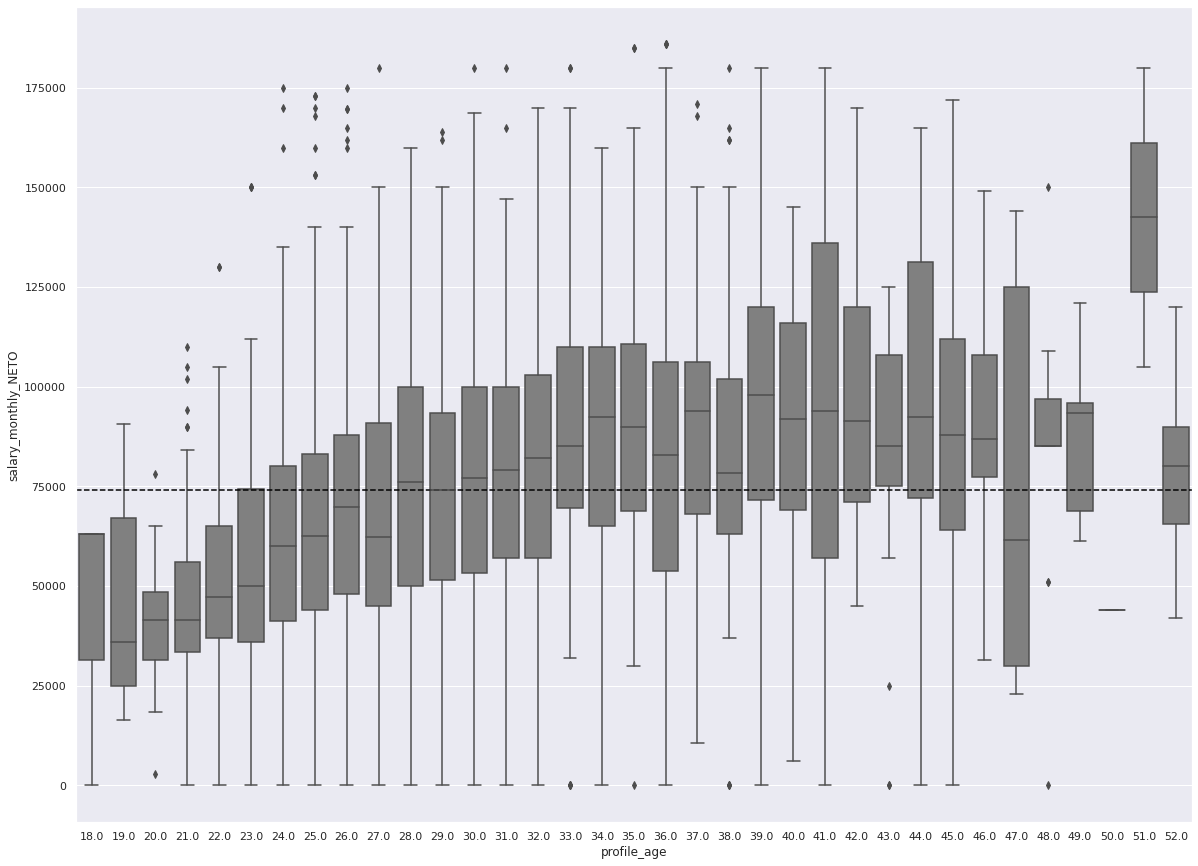

In [32]:
# Edad de las personas
fig = plt.figure(figsize=(20, 15))

chart = seaborn.boxplot(data=dataset,y='salary_monthly_NETO',x="profile_age",color='gray')
# dataset.groupby(dataset['profile_age'])['salary_monthly_NETO'].median()
chart.axhline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

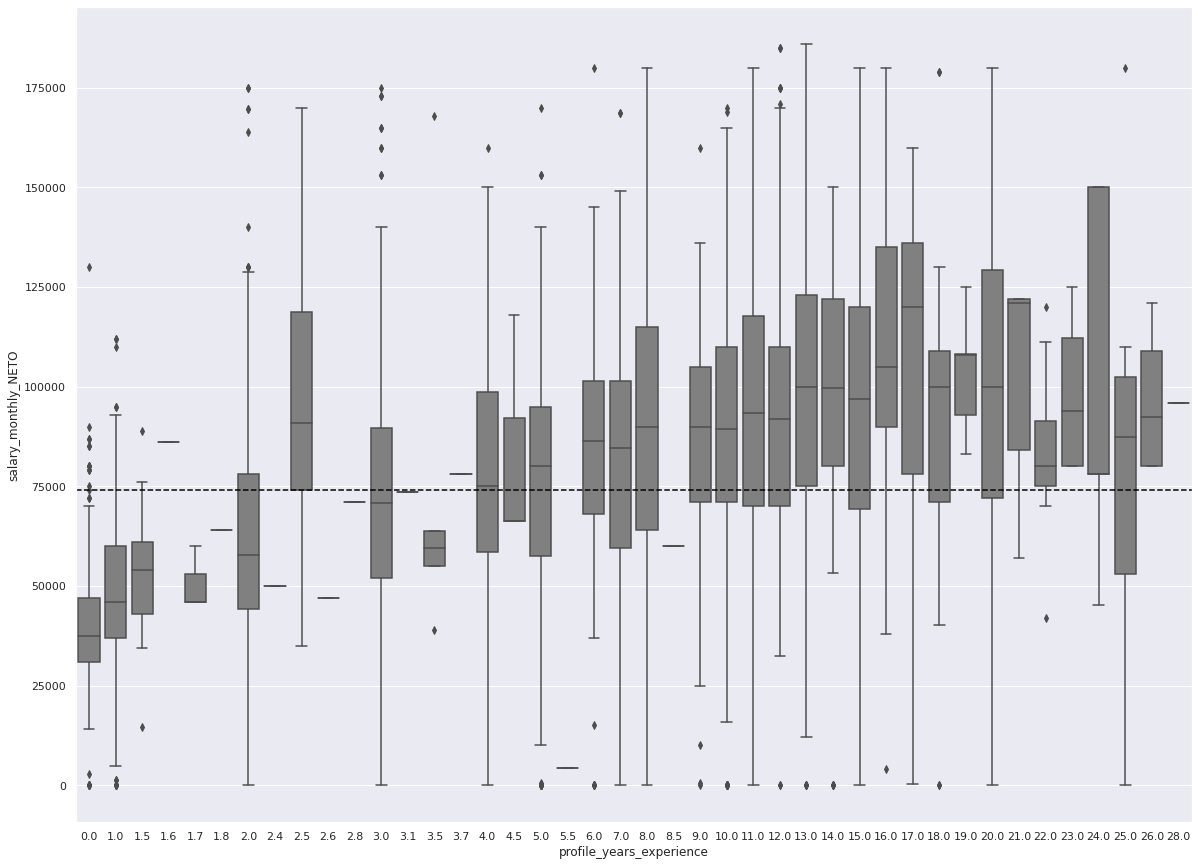

In [33]:
# Años de experiencia
fig = plt.figure(figsize=(20, 15))

chart = seaborn.boxplot(data=dataset,y='salary_monthly_NETO',x="profile_years_experience",color='gray')
# dataset.groupby(dataset['profile_age'])['salary_monthly_NETO'].median()
chart.axhline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

Analizamos la distribucion respecto de la "edad", "años de experiencia" para cada uno de los lenguajes

JAVA
  * Los sueldos de quienes tienen mas de 28 años se encuentran por encima de la mediana
  * Los sueldos de quienes tienen mas de 4 años de experiencia se encuentran por encima de la mediana

PYTHON
  * Los sueldos de quienes tienen mas de 27 años se encuentran por encima de la mediana
  * Los sueldos de quienes tienen mas de 4 años de experiencia se encuentran por encima de la mediana

JAVASCRIPT
  * Los sueldos de quienes tienen mas de 32 años se encuentran por encima de la mediana
  * Los sueldos de quienes tienen mas de 6 años de experiencia se encuentran por encima de la mediana

.NET
  * Los sueldos de quienes tienen mas de 33 años se encuentran por encima de la mediana
  * Los sueldos de quienes tienen mas de 10 años de experiencia se encuentran por encima de la mediana


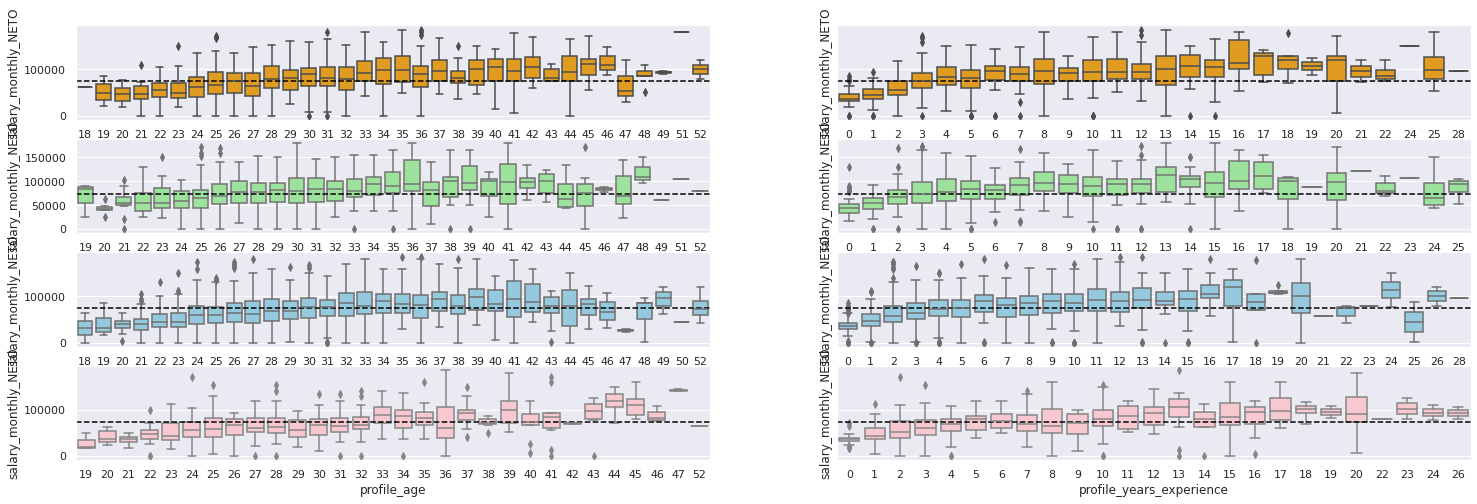

<Figure size 864x288 with 0 Axes>

In [34]:
# Distribucion del Salario Neto por lenguajes respecto de la "edad" y "años de experiencia"
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25,8), sharey='row')
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=0)
plt.figure(figsize=(12, 4))
chart_a = seaborn.boxplot(x=dataset[dataset.programming_language == 'java'].profile_age.apply(lambda s: int(s)), y=dataset[dataset.programming_language == 'java'].salary_monthly_NETO, color='orange', ax=axes[0,0])
chart_a.axhline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')
chart_b = seaborn.boxplot(x=dataset[dataset.programming_language == 'java'].profile_years_experience.apply(lambda s: int(s)), y=dataset[dataset.programming_language == 'java'].salary_monthly_NETO, color='orange', ax=axes[0,1])
chart_b.axhline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

chart_c = seaborn.boxplot(x=dataset[dataset.programming_language == 'python'].profile_age.apply(lambda s: int(s)), y=dataset[dataset.programming_language == 'python'].salary_monthly_NETO, color='lightgreen', ax=axes[1,0])
chart_c.axhline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')
chart_d = seaborn.boxplot(x=dataset[dataset.programming_language == 'python'].profile_years_experience.apply(lambda s: int(s)), y=dataset[dataset.programming_language == 'python'].salary_monthly_NETO, color='lightgreen', ax=axes[1,1])
chart_d.axhline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

chart_e = seaborn.boxplot(x=dataset[dataset.programming_language == 'javascript'].profile_age.apply(lambda s: int(s)), y=dataset[dataset.programming_language == 'javascript'].salary_monthly_NETO, color='skyblue', ax=axes[2,0])
chart_e.axhline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')
chart_f = seaborn.boxplot(x=dataset[dataset.programming_language == 'javascript'].profile_years_experience.apply(lambda s: int(s)), y=dataset[dataset.programming_language == 'javascript'].salary_monthly_NETO, color='skyblue', ax=axes[2,1])
chart_f.axhline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

chart_g = seaborn.boxplot(x=dataset[dataset.programming_language == '.net'].profile_age.apply(lambda s: int(s)), y=dataset[dataset.programming_language == '.net'].salary_monthly_NETO, color='pink', ax=axes[3,0])
chart_g.axhline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')
chart_h = seaborn.boxplot(x=dataset[dataset.programming_language == '.net'].profile_years_experience.apply(lambda s: int(s)), y=dataset[dataset.programming_language == '.net'].salary_monthly_NETO, color='pink', ax=axes[3,1])
chart_h.axhline(dataset.salary_monthly_NETO.median(),linestyle='--', label='Media', color='black')

Observamos que hay una correlacion positiva entre el tamaño de la empresa y el Sueldo Neto

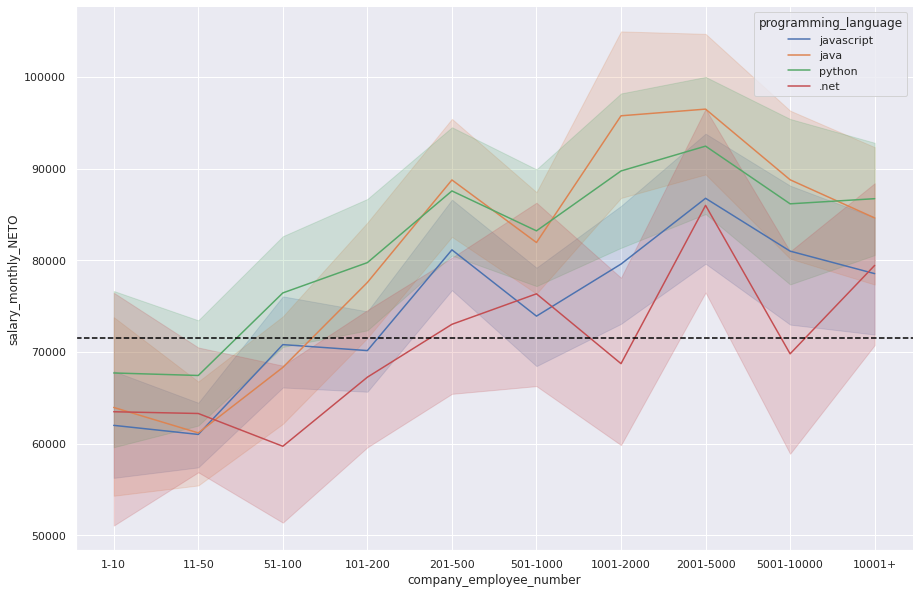

In [35]:
# Ordenamos de por el tamaño de la empresa
sorted_company_size = ['1-10', '11-50', '51-100', '101-200',
                         '201-500', '501-1000', '1001-2000','2001-5000',
                         '5001-10000','10001+']
dataset['company_employee_number'] = pd.Categorical(dataset['company_employee_number'], ordered=True, categories=sorted_company_size)

# Vemos la relacion respecto del tamaño de las empresas
fig = plt.figure(figsize=(15, 10))

select_lang = ['java', 'python', 'javascript','.net']
chart_hue = dataset[dataset.programming_language.isin(select_lang)].programming_language
x_1 = dataset[dataset.programming_language.isin(select_lang)].company_employee_number
seaborn.lineplot(data=dataset, x=x_1, y='salary_monthly_NETO', hue=chart_hue).axhline(df_final_lang.salary_monthly_NETO.median(), color='black',
            linestyle='--', label='Mediana')
# plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

Observamos que hay una correlacion positiva entre la edad y el Salario Neto

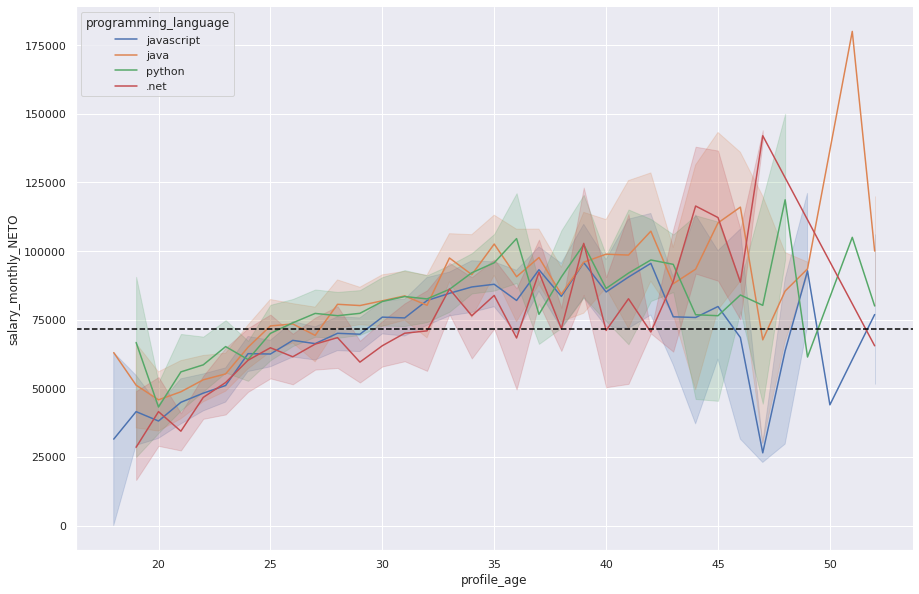

In [36]:
# Vemos la relacion respecto del tamaño de la edad
fig = plt.figure(figsize=(15, 10))

select_lang = ['java', 'python', 'javascript','.net']
chart_hue = dataset[dataset.programming_language.isin(select_lang)].programming_language
x_1 = dataset[dataset.programming_language.isin(select_lang)].profile_age
seaborn.lineplot(data=dataset, x=x_1, y='salary_monthly_NETO', hue=chart_hue).axhline(df_final_lang.salary_monthly_NETO.median(), color='black',
            linestyle='--', label='Mediana')
# plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

Observamos que hay una correlacion positiva entre los bonos otorgados por la empresa y el Sueldo Neto. Es decir, mientras mas alto es el Salario Neto del programador, mayores son los bonos que recibe por parte de la empresa.

Analisamos la distribucion respecto de la realizacion de cursos de especializacion

  * Observamos que si bien un gran porcentaje (75%) ha realizado estos cursos, no se visualiza una correlacion respecto del Salario Neto. La distribucion en ambos grupos es practicamente identica.

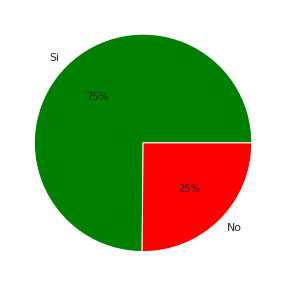

In [37]:
# Vemos la proporcion que realizo cursos de especializacion
data = dataset.groupby(['profile_specialization_courses']).profile_specialization_courses.count()
# Elimino respuesta que no tienen sentido
data.drop('No, Sí, de forma particular, Sí, los pagó un empleador',inplace=True)
data.drop('No, Sí, de forma particular',inplace=True)
# Agrupo los restantes en Resultados Positivos y Resultados Negativos
resultados_positivos = ['Sí, de forma particular',
       'Sí, de forma particular, Sí, los pagó un empleador',
       'Sí, los pagó un empleador']
resultados_negativos = ['No']
# Obtengo de la base la cuenta de las respuestas agrupadas por Resultados Positivos y Resultados Negativos
cuenta_positivos = dataset[dataset['profile_specialization_courses'].isin(resultados_positivos)].profile_specialization_courses.count()
cuenta_negativos = dataset[dataset['profile_specialization_courses'].isin(resultados_negativos)].profile_specialization_courses.count()
# Creo el label para mi diagrama
labels = ['Si','No']
# Inicializo la lista
data_resultados = [['Si', cuenta_positivos], ['No', cuenta_negativos]]
# Create the pandas DataFrame
df_specialization_courses = pd.DataFrame(data_resultados, columns = ['response', 'frequency'])
# Ploteo la distribucion, respecto de los cursos de especializacion
plt.figure(figsize=(5,5))
colors = {'green': 'Si',
           'red': 'No'}
r = plt.pie(df_specialization_courses.frequency, labels=df_specialization_courses.response, colors = colors, autopct='%.0f%%')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


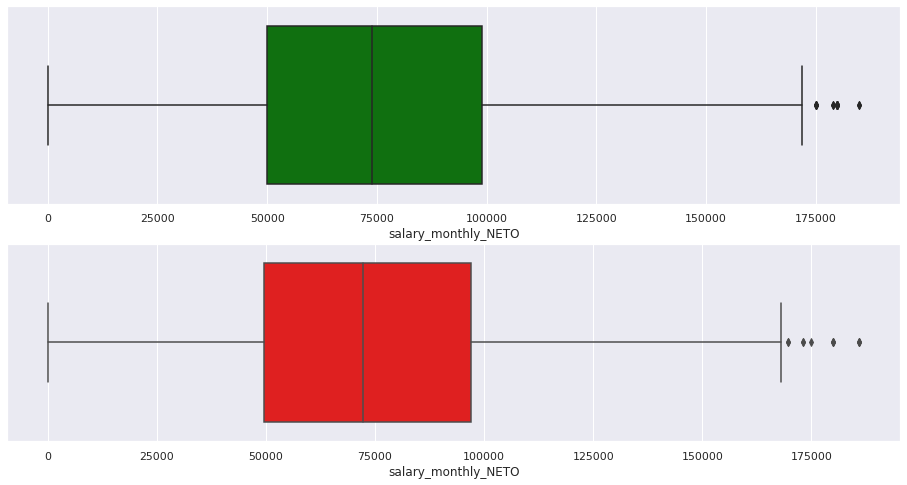

In [38]:
# Distribucion de salarios agrupados por la realizacion o no de cursos de especializacion
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
chart_si = seaborn.boxplot(dataset[dataset.profile_specialization_courses.isin(resultados_positivos)].salary_monthly_NETO,ax=axes[0],color='green')
chart_no = seaborn.boxplot(dataset[dataset.profile_specialization_courses.isin(resultados_negativos)].salary_monthly_NETO,ax=axes[1],color='red')